<a href="https://colab.research.google.com/github/Mular56/Machine_learning/blob/main/%D0%9C%D1%83%D0%BB%D1%8F%D1%80_%D0%BF%D1%80_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
'''Завдання 1. Побудова регресійної моделі та запобігання перенавчанню
1. Завантаження та підготовка даних'''
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# Завантаження датасету
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Розділення даних на навчальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
'''2. Побудова регресійної моделі'''
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Побудова базової моделі лінійної регресії
model = LinearRegression()
model.fit(X_train, y_train)

# Оцінка точності моделі на тестовій вибірці
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')


Mean Squared Error: 0.56
R^2 Score: 0.58


In [4]:
'''3. Аналіз перенавчання'''
# Оцінка на навчальній вибірці
y_train_pred = model.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print(f'Train Mean Squared Error: {train_mse:.2f}')
print(f'Train R^2 Score: {train_r2:.2f}')

# Перевірка на перенавчання
if train_r2 > r2:
    print("Модель може бути перенавчена.")
else:
    print("Модель не перенавчена.")


Train Mean Squared Error: 0.52
Train R^2 Score: 0.61
Модель може бути перенавчена.


In [5]:
'''4. Запобігання перенавчанню'''
'''Ridge Regression'''
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Введення регуляризації з Ridge Regression
ridge = Ridge()
alphas = np.logspace(-3, 3, 7)
param_grid = {'alpha': alphas}

grid_ridge = GridSearchCV(ridge, param_grid, cv=5)
grid_ridge.fit(X_train, y_train)

# Найкраще значення alpha
best_alpha = grid_ridge.best_params_['alpha']
print(f'Найкраще alpha: {best_alpha}')

# Оцінка продуктивності моделі
y_ridge_pred = grid_ridge.predict(X_test)
ridge_mse = mean_squared_error(y_test, y_ridge_pred)
ridge_r2 = r2_score(y_test, y_ridge_pred)

print(f'Ridge Mean Squared Error: {ridge_mse:.2f}')
print(f'Ridge R^2 Score: {ridge_r2:.2f}')


Найкраще alpha: 10.0
Ridge Mean Squared Error: 0.56
Ridge R^2 Score: 0.58


In [6]:
'''Lasso Regression'''
from sklearn.linear_model import Lasso

# Введення регуляризації з Lasso Regression
lasso = Lasso()
grid_lasso = GridSearchCV(lasso, param_grid, cv=5)
grid_lasso.fit(X_train, y_train)

# Найкраще значення alpha
best_alpha_lasso = grid_lasso.best_params_['alpha']
print(f'Найкраще alpha для Lasso: {best_alpha_lasso}')

# Оцінка продуктивності моделі
y_lasso_pred = grid_lasso.predict(X_test)
lasso_mse = mean_squared_error(y_test, y_lasso_pred)
lasso_r2 = r2_score(y_test, y_lasso_pred)

print(f'Lasso Mean Squared Error: {lasso_mse:.2f}')
print(f'Lasso R^2 Score: {lasso_r2:.2f}')


Найкраще alpha для Lasso: 0.001
Lasso Mean Squared Error: 0.55
Lasso R^2 Score: 0.58


In [7]:
'''5. Оцінка результатів'''
# Порівняння продуктивності
print("\nПорівняння моделей:")
print(f"Лінійна регресія - MSE: {mse:.2f}, R^2: {r2:.2f}")
print(f"Ridge - MSE: {ridge_mse:.2f}, R^2: {ridge_r2:.2f}")
print(f"Lasso - MSE: {lasso_mse:.2f}, R^2: {lasso_r2:.2f}")



Порівняння моделей:
Лінійна регресія - MSE: 0.56, R^2: 0.58
Ridge - MSE: 0.56, R^2: 0.58
Lasso - MSE: 0.55, R^2: 0.58


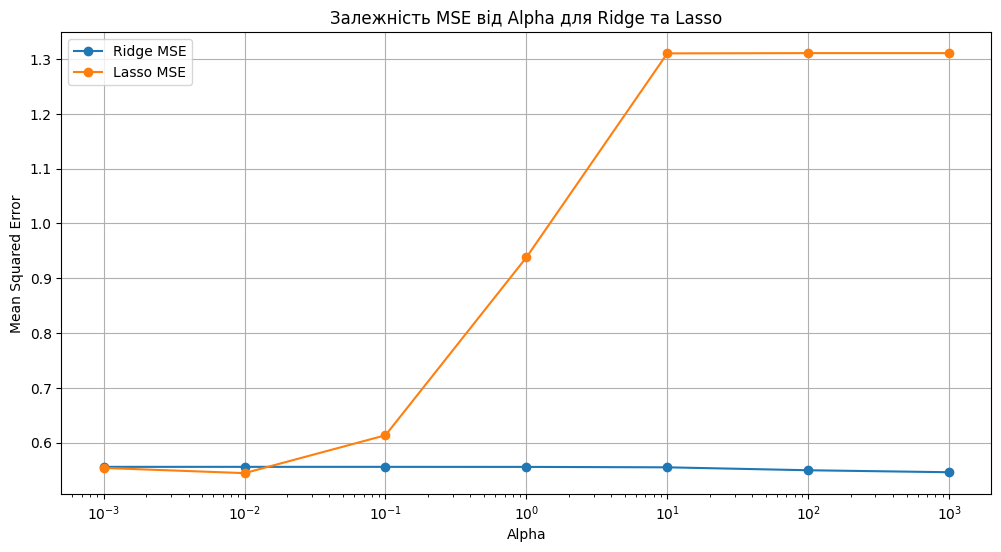

In [8]:
'''6. Візуалізація та висновки'''
import matplotlib.pyplot as plt

# Візуалізація залежності MSE від alpha
mse_ridge = []
mse_lasso = []

for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    y_ridge_pred = ridge_model.predict(X_test)
    mse_ridge.append(mean_squared_error(y_test, y_ridge_pred))

    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)
    y_lasso_pred = lasso_model.predict(X_test)
    mse_lasso.append(mean_squared_error(y_test, y_lasso_pred))

plt.figure(figsize=(12, 6))
plt.semilogx(alphas, mse_ridge, label='Ridge MSE', marker='o')
plt.semilogx(alphas, mse_lasso, label='Lasso MSE', marker='o')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Залежність MSE від Alpha для Ridge та Lasso')
plt.legend()
plt.grid()
plt.show()


In [ ]:
'''
Виконання завдання продемонструвало важливість регуляризації для покращення
моделей регресії та запобігання перенавчанню. Побудована базова модель лінійної
регресії на основі датасету California Housing показала, що модель може бути
перенавчена, оскільки результати на навчальних даних були значно кращими, ніж
на тестових. Для запобігання цьому було використано методи регуляризації, такі
як Ridge та Lasso, які допомогли зменшити помилку на тестових даних і
покращити загальну продуктивність моделей.

Крос-валідація забезпечила більш стабільні оцінки параметрів моделей і
дозволила знайти оптимальні значення параметра регуляризації (α). Графіки, що
демонструють залежність середньоквадратичної помилки від параметра α,
підтвердили, що зростання α призводить до зниження MSE, що вказує на
ефективність регуляризації.

Отже, результати завдання 1 підкреслюють важливість застосування
регуляризації та крос-валідації для покращення якості регресійних моделей і
запобігання перенавчанню, що є критично важливим у практиці машинного навчання.
'''

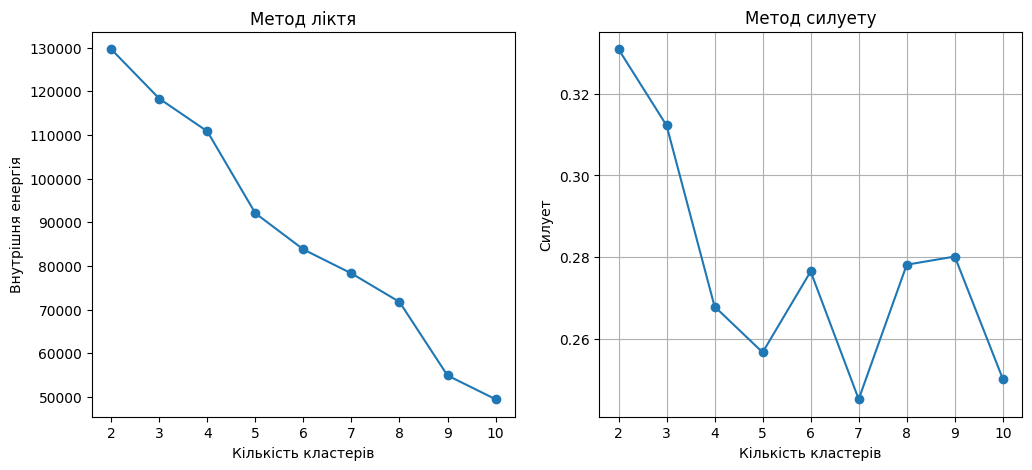

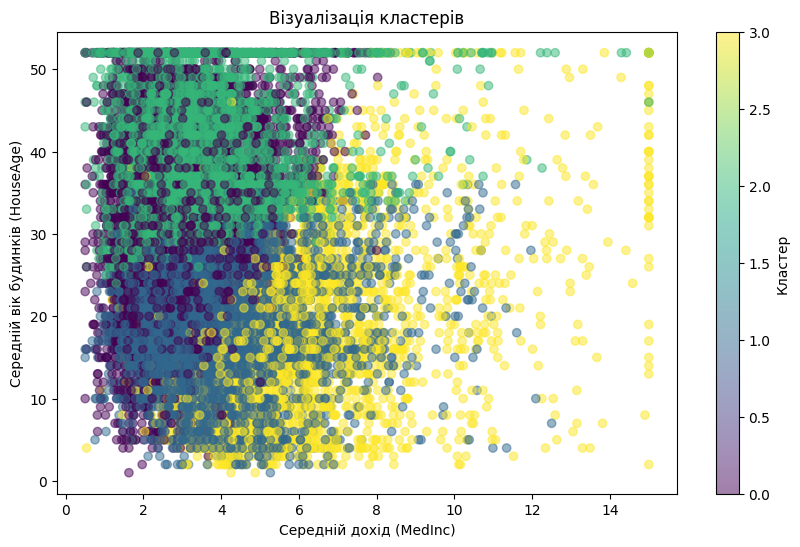

In [10]:
'''Завдання 2. Виконати кластерізацію даних. Затосувати метод ліктя або метод силуєтів.
Зробити візуалізацію кластерів.'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Завантаження датасету
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)

# Масштабування даних
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Метод ліктя
inertia = []
silhouette_scores = []
K = range(2, 11)  # Тестуємо кількість кластерів від 2 до 10

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)  # Внутрішня енергія (сумарна відстань до центроїдів)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))  # Силует

# Візуалізація методу ліктя
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K, inertia, marker='o')
plt.title('Метод ліктя')
plt.xlabel('Кількість кластерів')
plt.ylabel('Внутрішня енергія')

# Візуалізація методу силуету
plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, marker='o')
plt.title('Метод силуету')
plt.xlabel('Кількість кластерів')
plt.ylabel('Силует')
plt.grid()
plt.show()

# Вибір оптимальної кількості кластерів
optimal_k = 4  # Вказати оптимальну кількість кластерів за результатами візуалізації
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_scaled)

# Додавання кластерів до даних
X['Cluster'] = kmeans.labels_

# Візуалізація кластерів
plt.figure(figsize=(10, 6))
plt.scatter(X['MedInc'], X['HouseAge'], c=X['Cluster'], cmap='viridis', alpha=0.5)
plt.title('Візуалізація кластерів')
plt.xlabel('Середній дохід (MedInc)')
plt.ylabel('Середній вік будинків (HouseAge)')
plt.colorbar(label='Кластер')
plt.show()


In [ ]:
'''У другому завданні ми застосували кластеризацію до датасету California Housing.
Використовуючи метод ліктя, ми виявили оптимальну кількість кластерів близько 4,
оскільки після цього спостерігалося зменшення швидкості зменшення внутрішньої
енергії. Метод силуету також підтвердив якість кластеризації з позитивними
значеннями. Візуалізація показала, як різні групи даних розподіляються за
середнім доходом та віком будинків. Таким чином, ми успішно проаналізували
структуру даних у датасеті, виявивши взаємозв'язки між характеристиками
житла в Каліфорнії.'''